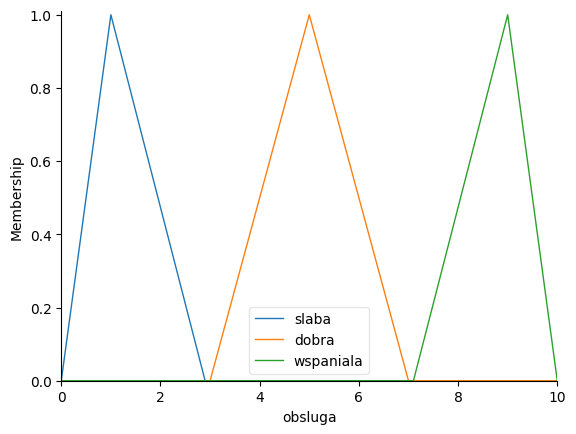

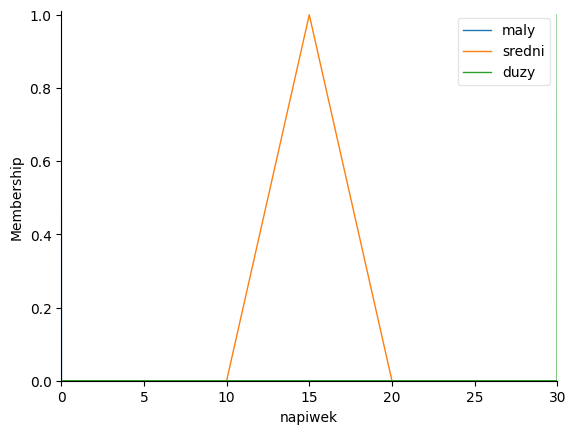

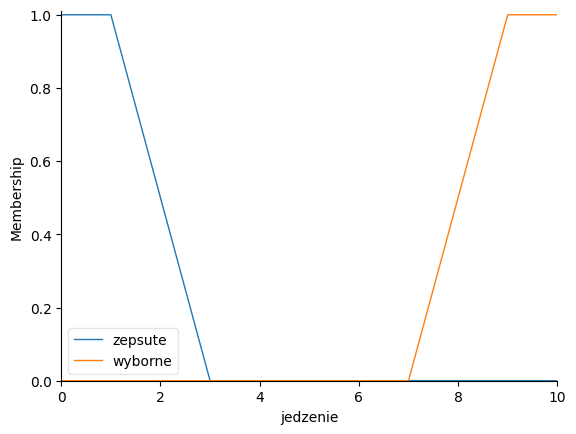

In [36]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

obsluga = ctrl.Antecedent(np.arange(0,10.01,0.01), 'obsluga')
napiwek = ctrl.Consequent(np.arange(0,30.01,0.01), 'napiwek')
jedzenie = ctrl.Antecedent(np.arange(0,10.01,0.01), 'jedzenie')

# obsluga['slaba'] = fuzz.gaussmf(obsluga.universe,  0, 1.5)
# obsluga['dobra'] = fuzz.gaussmf(obsluga.universe,  5, 1.5)
# obsluga['wspaniala'] = fuzz.gaussmf(obsluga.universe,  10, 1.5)

obsluga['slaba'] = fuzz.trimf(obsluga.universe, [0, 1, 2.9])
obsluga['dobra'] = fuzz.trimf(obsluga.universe, [3, 5, 7])
obsluga['wspaniala'] = fuzz.trimf(obsluga.universe, [7.1, 9,10])

napiwek['maly'] = fuzz.trimf(napiwek.universe, [0,0,1e-40])
napiwek['sredni'] = fuzz.trimf(napiwek.universe, [10, 15, 20])
napiwek['duzy'] = fuzz.trimf(napiwek.universe, [30- 1e-10,30,30])

jedzenie['zepsute'] = fuzz.trapmf(jedzenie.universe,  [-2, 0, 1, 3])
jedzenie['wyborne'] = fuzz.trapmf(jedzenie.universe, [7, 9, 10, 12])


regula1 = ctrl.Rule(obsluga['slaba'], napiwek['maly'])
regula2 = ctrl.Rule(obsluga['dobra'], napiwek['sredni'])
regula3 = ctrl.Rule(obsluga['wspaniala'], napiwek['duzy'])
regula4 = ctrl.Rule(jedzenie['zepsute'], napiwek['maly'])
regula5 = ctrl.Rule(jedzenie['wyborne'], napiwek['duzy'])

obsluga.view()
napiwek.view()
jedzenie.view()

napiwek_ctr = ctrl.ControlSystem([regula1,regula2,regula3,regula4,regula5])
napiwek_sym = ctrl.ControlSystemSimulation(napiwek_ctr)



Wynik 0.0033333333333333335
Wynik 29.996666666666666


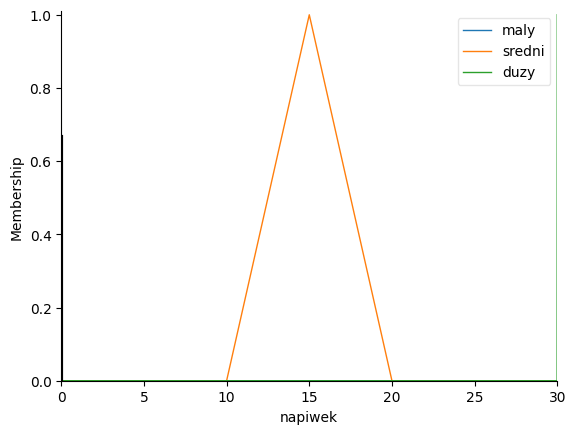

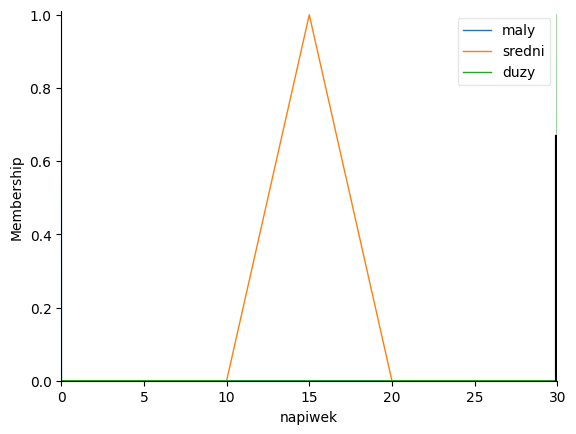

In [37]:
napiwek_sym.input['obsluga'] = 0
napiwek_sym.input['jedzenie'] = 0
napiwek_sym.compute()
print('Wynik',napiwek_sym.output['napiwek'])
napiwek.view(sim=napiwek_sym)

napiwek_sym.input['obsluga'] = 10
napiwek_sym.input['jedzenie'] = 10
napiwek_sym.compute()
print('Wynik',napiwek_sym.output['napiwek'])
napiwek.view(sim=napiwek_sym)

Wynik 29.996666666666666


ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.

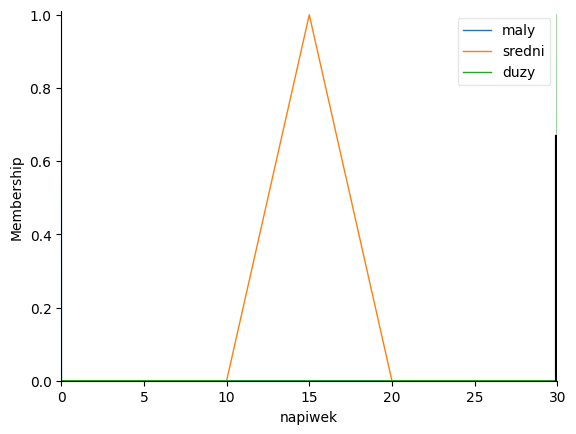

In [38]:
napiwek_sym.input['obsluga'] = 10
napiwek_sym.input['jedzenie'] = 10
napiwek_sym.compute()
print('Wynik',napiwek_sym.output['napiwek'])
napiwek.view(sim=napiwek_sym)



In [ ]:
n_points = 100
upsampled = np.linspace(0, 10, n_points)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
# Loop through the system 21*21 times to collect the control surface
for i in range(n_points):
    for j in range(n_points):
        napiwek_sym.input['obsluga'] = x[i, j]
        napiwek_sym.input['jedzenie'] = y[i, j]
        napiwek_sym.compute()
        z[i, j] = napiwek_sym.output['napiwek']
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('obsługa')
ax.set_ylabel('jedzenie')
ax.set_zlabel('napiwek')
ax.view_init(30, 200)
print(z.min())
print(z.max())

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.